# **Sistema Não Lineares**
---
<ul>
  <li><a href="#scrollTo=6T7Gy-Docn5C&uniqifier=1">Sistemas Não Lineares</a>
  </li>
  <ul>
      <li><a href="#scrollTo=E2wcnL1ak8bG&uniqifier=1">Introdução</a></li>
    <li><a href="#scrollTo=pFFXXiPXkxvA&uniqifier=1">Funções comuns</a></li>
    <li>Equações não lineares
      <ul>
          <li><a href="#scrollTo=4Vd2bqLKpwpr&uniqifier=1">Método da Bisseção</a></li>
          <li><a href="#scrollTo=JpN1O-_mHgEp&uniqifier=1">Método de Newton Rapshon</a></li>
      </ul>
    </li>
    <li>Sistemas não lineares
        <ul>
          <li><a href="#scrollTo=rbTmOuRnJeHE&uniqifier=1">Extensão do Método de Newton Rapshon</a></li>
      </ul>
    </li>
    <li><a href="#scrollTo=0f95KhC9xzad&uniqifier=1">Aplicações</a></li>
  </ul>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

## Introdução


Dado f, e um intervalo onde ela é continua e tem uma possivel intersecção com o eixo-x:

Seja $f \in C[a,b]$, dizemos que $x$ é solução quando $f(x) = 0$.

Tal como $x - A*cos(2*x) - b = 0$

Para resolver esse problema computacionalmente, utilizamos métodos iterativos. Assim, é necessário chutar o vetor $x_{0}$ e aproximar a cada iteração $x_{k}$ de $x$.

Dessa forma, critérios de parada devem ser estabelecidos. 

$\left\{\begin{matrix}
 (1)Limite\space  de  \space iterações & k & =  & k_{kmax}\\ 
 (2)Erro \space absoluto: & |x_{k} - x_{k-1}| & <  & e\\
 (3)Erro \space relativo: & |x_{k} - x_{k-1}| & <  & e|x_k| \\
 (4)Teste \space do \space Resíduo: & |f(x_k)| & <  & e \\
\end{matrix}\right.$

O primeiro critério é indispensavel, para caso o método não convergir ou demorar para atingir o $|f(x_k)| < e$.Em aplicações, veremos que esses critérios estão sucetiveis a falsos positivos.

## Decorator para medir tempo.

In [ ]:
import time

# Decorator timeit
# Retorna o tempo de excução da função
# Não modifica a função.
# Para mais informações sobre decorators e timeit:
# https://medium.com/pythonhive/python-decorator-to-measure-the-execution-time-of-methods-fa04cb6bb36d
def timeit(method):
    def timed(*args, **kw):
        ts = time.time();
        result = method(*args, **kw);

        te = time.time();

        # Armazenar resultado
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__);
            kw['log_time'][name].append((te - ts) * 1000);
        else:
            print("%r  %2.5f ms" % (method.__name__, (te - ts) * 1000));
        return result
    return timed

# Equações não lineares

## Método da Bissecção

Esse método é simplesmente uma busca binária, em que o intervalo de busca é divido ao meio, mas sempre conferindo a possibilidade de a raiz está dentro do intervalo.

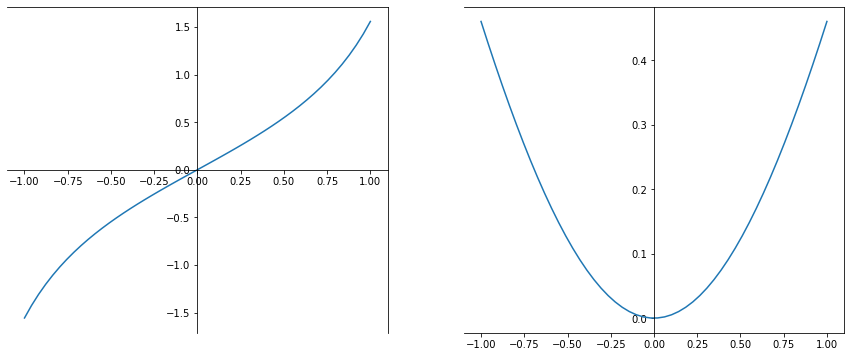

In [ ]:
 # Cria quadro
fig, ax = plt.subplots(1,2, figsize=(15,6));

# intervalo
x = np.linspace(-1, 1);

# f(x) = y
y = []
for i in x:
  y.append(np.math.tan(i));

y1 = []
for i in x:
  y1.append(1 - np.math.cos(i));

# Centralizar eixos
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('center')
ax[1].spines['left'].set_position('center')

# Plot time
ax[0].plot(x, y);
ax[1].plot(x, y1);

plt.show();


Note, pela figura 2, se a função é par no intervalo, e $|a| \neq |b|$, então o método não pode calcular uma solução.

Se queremos encontrar f(x) = tan(x) = 0 no intervalo [-1, 0.75].

Pela figura 1, podemos observar que se f(X) passa por y = 0, então $f(x_1) * f(x_2) < 0$.

Para estreitar o intervalo e aproximar-se da raiz, calcula-se o meio do intervalo $x_{mid} = (x_1 + x_2) /  2$

$x_2$ recebe $x_{mid}$ se $f(x_1)f(x_{mid}) < 0$

$x_1$ recebe $x_{mid}$ se $f(x_{mid})f(x_2) < 0$ 

O método começa a convergir quando o intervalo é suficientemente pequeno. $|x_1 - x_2| < e$

Além disso, facilmente observa-se a complexidade como: $\delta x$ é dividido por 2 a cada iteração. Portanto na iteração n temos $\delta x / 2^n = e$ => $ n = \log_2(\delta x / e) $

In [ ]:
# Recebe uma função func, e o intervalo [a, b] onde há uma possível solução.
def bisection(func, a, b, e=1.0e-9):
  fa = func(a);
  
  if(fa == 0.0):
    return a; 
  
  fb = func(b);

  if(fb == 0.0):
    return b;

  try:
    if( fa * fb > 0.0 ):
      raise NameError('NoSolution');
    
    n = np.ceil(np.log(np.abs(b - a)/e)/np.log(2.0));
    for i in np.arange(n):
      mid = 0.5*(a + b);
      fmid = func(mid);

      if(fmid == 0.0):
        return mid;
      
      if(fa * fmid < 0.0):
        fb = fmid;
        b = mid;
      else:
        fa = fmid;
        a = mid;
    return (a + b)/2.0;
  except NameError:
      print('This can not find a solution to this function in this range[a,b].')
      raise

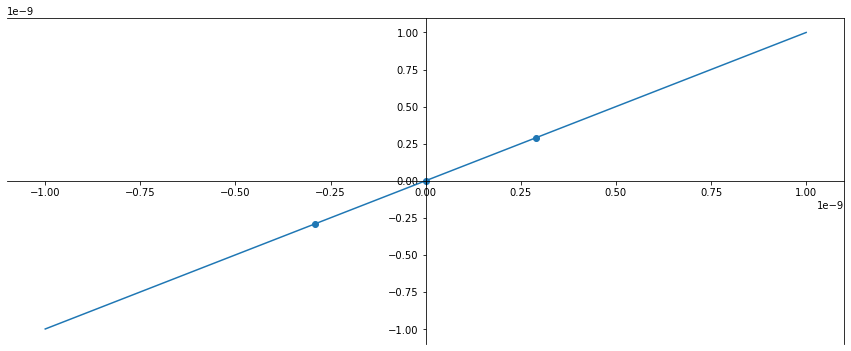

In [ ]:
# Plot da tnagente no diferentes intervalos
x_sample = [];

x_sample.append(bisection(np.tan, -0.75, 0.75, e=1.0e-9));
x_sample.append(bisection(np.tan, -1, 0.75, e=1.0e-9));
x_sample.append(bisection(np.tan, -0.75, 1, e=1.0e-9));

y_sample = [np.tan(x_sample[0]), np.tan(x_sample[1]), np.tan(x_sample[2])];

# Cria quadro
fig, ax = plt.subplots(1,1, figsize=(15,6));

# intervalo
x = np.linspace(-1e-9, 1e-9);

# f(x) = y
y = []
for i in x:
  y.append(np.math.tan(i));

# Centralizar eixos
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Plot time
ax.plot(x, y);
ax.scatter(x_sample, y_sample);

plt.show();

No gráfico acima, vemos que a escolha do intervalo interfere na resposta, porém ela possuí uma precisão pré estimada de $10^{-10}$.

Estratégia: encontrar a tal que f(a) > 0 e f(b) < 0, então o método poe ser aplicado. 

## Método de Newton raphson / Secante

Esse método exige que $f(x)$ seja diferenciavel $f'(x)$ e pode ser obtido a partir da Expansão de Taylor.

Expansão de Taylor

$f(x) \approx f(x_k) + f'(x_k)(x - x_k)$

Para $f(\alpha) = 0$

$0 \approx f(x_k) + f'(x_k)(\alpha - x_k)$

$\alpha \approx x_k - (f(x_k)/f'(x_k))$

Portanto:

$(1) \space x_{k+1} \approx x_k - (f(x_k)/f'(x_k))$

Para evitar o cáculo de $df/dx$, aproximaremos usando o método da secante. Note que para aproximar a derivada no ponto, são necessários dois pontos, então o chute incial consiste agora de dois chutes.

$(2) \space f'(x_k) \approx (f(x_k) - f(x_{k-1})) / (x_l - x_{k-1})$

Juntando $(1)$ e $(2)$

$ x_{k+1} \approx x_k - (f(x_k)(x_l - x_{k-1})/f(x_k) - f(x_{k-1}))$


In [ ]:
# Recebe uma função func, e o intervalo [a, b] onde há uma possível solução.
def secante(func, a, b, e=1.0e-9):
  fa = func(a);
  
  if(fa == 0.0):
    return a; 
  
  fb = func(b);

  if(fb == 0.0):
    return b;

  try:
    if( fa * fb > 0.0 ):
      raise NameError('NoSolution');
    
    for i in np.arange(30):
      x = 0.5*(a + b);
      fx = func(x);

      if(np.abs(fx) < e):
        return x;

      if(fa * fx < 0.0):
        fb = fx;
        b = x;
      else:
        fa = fx;
        a = x;

      dfx = ( (fb - fa) / (b - a) );
      dx = 0

      if(dfx == 0):
        dx = b - a;
      else:
        dx = -fx/dfx;
      
      x = x + dx;

      # If x esta fora de [a,b]
      if(x > b or x < a):
        dx = 0.5*(b-a);
        x = a + dx;

      
      if(np.abs(dx) < e*max(abs(b), 1)):
        return x;

    return (a + b)/2.0;
  except NameError:
      print('This can not find a solution to this function in this range[a,b].')
      raise

In [ ]:
def f(x):
  return (x**3) - (10*(x**2)) + 5;

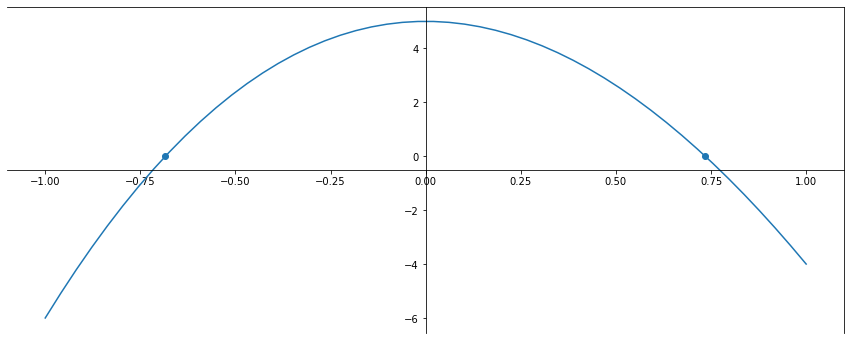

In [ ]:
# Plot da tnagente no diferentes intervalos
x_sample = [];

x_sample.append(secante(f, 0, 1, e=1.0e-9));
x_sample.append(secante(f, -1.0, 0., e=1.0e-9));

y_sample = [f(x_sample[0]), f(x_sample[1])];

# Cria quadro
fig, ax = plt.subplots(1,1, figsize=(15,6));

# intervalo
x = np.linspace(-1, 1);

# f(x) = y
y = []
for i in x:
  y.append(f(i));

# Centralizar eixos
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Plot time
ax.plot(x, y);
ax.scatter(x_sample, y_sample);

plt.show();

# Sistemas não lineares

## Extensão do Método de Newton

A extensão do método de Newton Rapshon refere-se a resolução de sistemas não lineares, que são compostos por equações não lineares.

$F(x)=\left\{\begin{matrix}
 f_1 &(x_1,  & \dots &, x_n) = 0\\ 
 f_2 &(x_1,  & \dots &, x_n) = 0\\ 
 \vdots & \vdots & \vdots & \vdots\\ 
 f_n &(x_1,  & \dots &, x_n) = 0 
\end{matrix}\right.$

$F(x) = 0$

Novamento, por Taylor, suponha $f: R^n \to R^n (diferenciavel)$, sendo v um vetor direção v = $(v_1, ...., v_n)^t, podemos aproximar a função como$

$f(x + v) \approx f(x) + J(x)v + O(||v^2||)$

$\mathbf{J(x)}_{i,j} =
\begin{bmatrix}
  \frac{\partial J_1}{\partial x_1} & 
    \frac{\partial J_1}{\partial x_2} & 
    \frac{\partial J_1}{\partial x_3} \\[1ex] % <-- 1ex more space between rows of matrix
  \frac{\partial J_2}{\partial x_1} & 
    \frac{\partial J_2}{\partial x_2} & 
    \frac{\partial J_2}{\partial x_3} \\[1ex]
  \frac{\partial J_3}{\partial x_1} & 
    \frac{\partial J_3}{\partial x_2} & 
    \frac{\partial J_3}{\partial x_3}
\end{bmatrix}$

Agora, em vez de chutar um ponto $x_0$, chuta-se um vetor $x_0$, e a cada iteração do método será gerado um vetor novo.

Para $f(\alpha) = 0 = x_k + v_k$

> $0 = f(\alpha) = f(x_k + v) \approx  f(x_k) + J(x_k)*v$

A partir dessa equação chega-se no sistema linear que para o vetor $x_i = b$ e a matriz J = A, decobre-se $v_k = x$

> $-f(x_k) = J(x_k)*v_k$
>
> $x_{k+1} = x_k + v_k$

Outra forma de calcular $x_{k+1}$ é multiplicando a equação ao lado pela inversa da matriz Jacobiana. 

> $-J(x_k)^{-1}f(x_k) = v_k$
>
> $x_{k+1} = x_k + v_k$



In [ ]:
def newtonRapshon_j(f, x, tol = 1.0e-9):
  
  # Calcula a matriz Jacobiana de f em x
  def jacobiano(f, x):
    h = 1.0e-4
    n = x.shape[0]
    jac = np.zeros([n, n], dtype='float64');

    # f0 = { f1(x), f2(x), ..., fn(x) }
    f0 = f(x) 
    for i in np.arange(n):
      aux = x[i]
      x[i] = aux + h  # x = {x0, ..., xi + h, ..., xn } ; avança x na direção ith
      f1 = f(x)       # f1 = { f1/di, f2/di, ..., fn/di }
      x[i] = aux
      jac[:, i] = (f1 - f0) / h;
    return jac, f0;
  
  for i in np.arange(30):
    jac, f0 = jacobiano(f, x);
    if(np.sqrt(np.dot(f0, f0)) < tol):
      return x;
    else:
      dx = np.linalg.solve(jac, -f0);
      x = x + dx;
      if(1.0 > np.max(np.abs(x))):
        y = 1.0
      else:
        y = np.max(np.abs(x))
      
      if(np.sqrt(np.dot(dx, dx)) < tol*y):
        return x
  print('The solution is far yet.')
  return -1

In [ ]:
# F(X) = 0
def newtonRapshon_ji(f, x, tol = 1.0e-9):
  
  def jacobiano(f, x):
    h = 1.0e-4;
    n = x.shape[0];
    jac = np.zeros([n, n], dtype='float64');
    f0 = f(x) # f0 = { f1(x), f2(x), ..., fn(x) }
    for i in np.arange(n):
      aux = x[i];
      x[i] = aux + h; # x = {x0, ..., xi + h, ..., xn } ; avança x na direção ith
      f1 = f(x);      # f1 = { f1/di, f2/di, ..., fn/di }
      x[i] = aux;
      jac[:, i] = (f1 - f0) / h;
    return jac, f0;
  
  for i in np.arange(30):
    jac, f0 = jacobiano(f, x);
  
    # the solutions is near enough of f(X) ~ 0
    if(np.sqrt(np.dot(f0, f0)) < tol):
      return x;
    else:
      jac_inv = np.linalg.inv(jac);
      
      # x_k_new = x_k - (jacobiana_inversa @ F(x_k)) 
      dx = jac_inv.dot(f0);
      x = x - dx;
      if(1.0 > np.max(np.abs(x))):
        y = 1.0;
      else:
        y = np.max(np.abs(x));
      
      # Se dx for indicar pouco deslocamento:
      if(np.sqrt(np.dot(dx, dx)) < tol*y):
        return x;
  print('The solution is far yet.');
  return -1;


## Funções finais

In [ ]:
@timeit
def newtonRapshon_j_method(f, x0, tol= 1.49012e-08, **kwards):
  x = np.copy(x0);
  return newtonRapshon_j(f, x, tol);

In [ ]:
@timeit
def newtonRapshon_ji_method(f, x0, tol= 1.49012e-08, **kwards):
  x = np.copy(x0);
  return newtonRapshon_ji(f, x, tol); 

In [ ]:
from scipy.optimize import fsolve

@timeit
def fsolve_method(f, x0, tol= 1.49012e-08, **kwards):
  x = np.copy(x0);
  return fsolve(f, x);

# Aplicações

In [ ]:
def compare_methods(f, ferr, guess):
  # Tempo gerado por execução
  logtime_data = {
     "newtonRapshon_j_method": [],
     "newtonRapshon_ji_method" : [],
     "fsolve_method": []
  }

  logerr_data = {
     "newtonRapshon_j_method": [],
     "newtonRapshon_ji_method" : [],
     "fsolve_method": []
  }

  x_sample = []
  for i in range(1, 100):
    x = i*guess;
    x_sample.append(i);

    # Testa teste entre 10 e maxn, com a matriz aumentando em increment passos.
    logerr_data["fsolve_method"].append(ferr(fsolve_method(f,  x, log_time= logtime_data)));
    logerr_data["newtonRapshon_j_method"].append(ferr(newtonRapshon_j_method(f,  x, log_time= logtime_data)));
    logerr_data["newtonRapshon_ji_method"].append(ferr(newtonRapshon_ji_method(f,  x, log_time= logtime_data)));
    
  # Quadro do plot  
  fig = plt.figure(figsize=(12,6));
  ax = fig.add_subplot(111);
  
  # Plot time
  ax.plot(x_sample, logtime_data.get("newtonRapshon_j_method"), 'b', label= "newtonRapshon_j_method" + " time",  linewidth=3.5);
  ax.plot(x_sample, logtime_data.get("newtonRapshon_ji_method"), 'y', label= "newtonRapshon_ji_method" + " time",  linewidth=3.5);
  ax.plot(x_sample, logtime_data.get("fsolve_method"), 'g', label= "fsolve_method" + " time",  linewidth=3.5);
  
  # Plot de Erro
  ax2 = ax.twinx();
  ax2.scatter(x_sample, logerr_data.get("newtonRapshon_j_method"), label= "newtonRapshon_j_method" + "  error", marker='o',  color='b');
  ax2.scatter(x_sample, logerr_data.get("newtonRapshon_ji_method"), label= "newtonRapshon_ji_method" + " error",  marker='o',  color='y');
  ax2.scatter(x_sample, logerr_data.get("fsolve_method"), label= "fsolve_method" + " error",  marker='o',  color='g');

  # Legendas
  ax.set(title="Tempo(s) de execução em função do range", xlabel="Tamanho n", ylabel="Tempo(s)");
  ax.legend(loc="best", fontsize='large');
  
  ax2.set_ylabel('Erros', color='r');
  ax2.legend(loc="best", fontsize='large');
  
  plt.show();

## Pontos de interseção entre um circulo e uma hipérbole

In [ ]:
# Recebe o vetor x
def hipcirc(x):
  # Intersecção entre circulo e hipérbole:
  # f1(x, y) = x^2 + y^2 - 3 = 0
  # f2(x, y) = xy - 1 = 0
  f = np.zeros([2], dtype = 'float64');
  f[0] = (x[0]*x[0]) + (x[1]*x[1]) - 3;
  f[1] = (x[0]*x[1]) - 1;
  return f;

In [ ]:
def hipcirc_err(x):
  return np.linalg.norm(hipcirc(x));

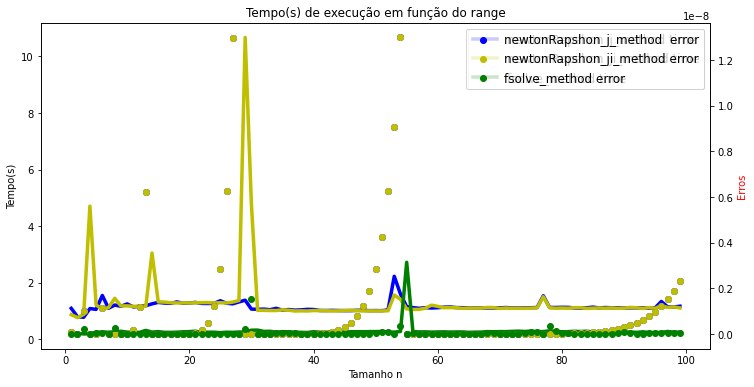

In [ ]:
x = np.array([-0.5, 1.5], dtype='float64')
compare_methods(hipcirc, hipcirc_err, x);

Nesse teste, a chute começou com um intervalo de tamanho 1, e continuou aumentando até 100. 
Pelo gráfico gerado, é possível concluir que fsolve é consideravelmente mais estável, tanto em tempo quanto em erro. O métdo de newton com a Jacobiana inversa apresentou piores resultados, pois o tempo oscila mais e os erros foram maiores.

## A resolução da Equação da Circunferência

Dado a equação do  circulo: 

$(x - a)^2 + (y - b)^2 = R^2$

E três pontos que passam por ele $(8.21, 0), (0.34, 6.62), (5.96,-1.12)$ que retornam o raio.

Encontra $a,b$ e $R$

In [ ]:
def f_circ(x):
  n = 3
  f = np.zeros([n], dtype = 'float64')

  a = np.copy(x[0]);
  b = np.copy(x[1]);
  r = np.copy(x[2]);
  R = r*r;

  f[0] = ((8.21 - a)*(8.21 - a)) + ((0.0 - b)*(0.0 - b)) - R;
  f[1] = ((0.34 - a)*(0.34 - a)) + ((6.62 - b)*(6.62 - b)) - R;
  f[2] = ((5.96 - a)*(5.96 - a)) + ((-1.12 - b)*(-1.12 - b)) - R;
  return f;

In [ ]:
def circ_err(x):
  return np.linalg.norm(f_circ(x));

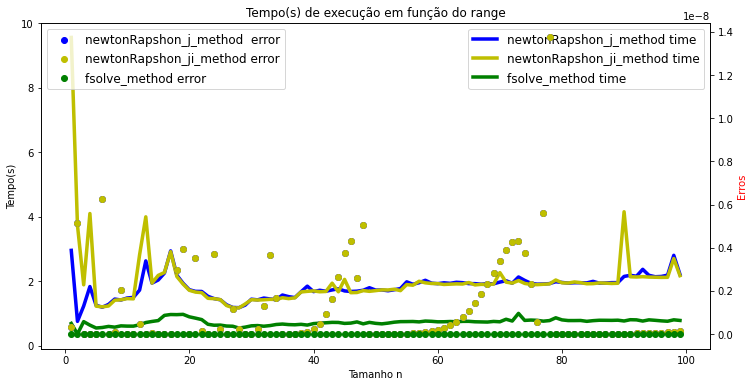

In [ ]:
x = np.array([1.0, 1.0, 1.0], dtype='float64');
compare_methods(f_circ, circ_err, x);